In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv


In [ ]:
df=pd.read_csv("/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv")
df.head

<bound method NDFrame.head of       Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle   

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Decoding
        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count              1000.000000   1000.000000  1000.00000  
mean                  4.761905     15.379369     6.97270  
std                   0.000000     11.708825     1.71858  
min                   4.761905      0.508500     4.00000  
25%                   4.761905      5.

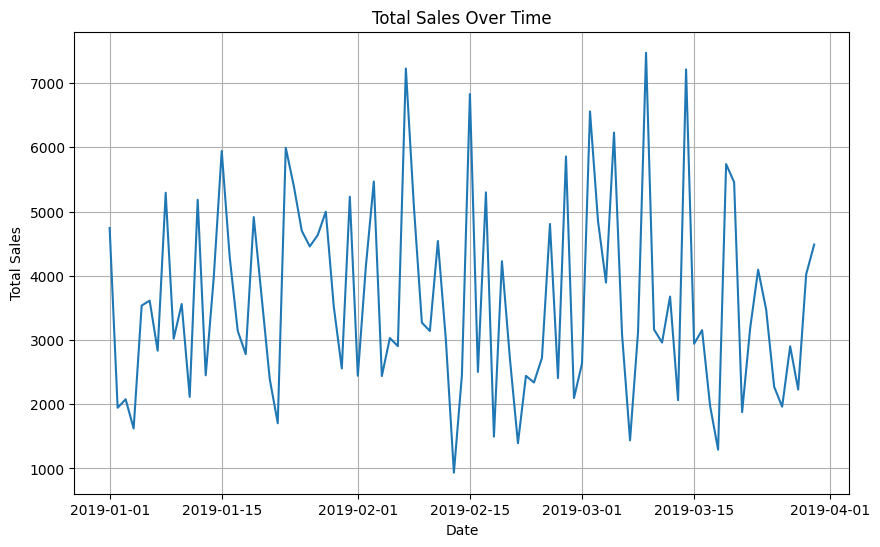

 
				 Execution time for plot_sales_over_time: 0.4465 seconds


In [ ]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from functools import wraps

def timing_decorator(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(" ")
        print(f"\t\t\t\t Execution time for {func.__name__}: {end_time - start_time:.4f} seconds")
        return result
    return wrapper

class SalesDataProcessor:
    def __init__(self, file_path):
        self.data = pd.read_csv(file_path)

    @timing_decorator
    def summarize_data(self):
        """Print summary statistics of the sales data."""
        print("Decoding")
        summary = self.data.describe()
        print(summary)
        return summary

    @timing_decorator
    def plot_sales_over_time(self):
        """Plot total sales over time."""
        self.data['Date'] = pd.to_datetime(self.data['Date'])
        sales_over_time = self.data.groupby('Date')['Total'].sum()

        plt.figure(figsize=(10, 6))
        plt.plot(sales_over_time.index, sales_over_time.values)
        plt.title('Total Sales Over Time')
        plt.xlabel('Date')
        plt.ylabel('Total Sales')
        plt.grid(True)
        plt.show()

# Example usage:
file_path = '/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv'
processor = SalesDataProcessor(file_path)
processor.summarize_data()
processor.plot_sales_over_time()
